We want to compare mcvine and covmat method results for different slicing directions

In [1]:
workdir = '/SNS/users/p63/ORNL_public_research/MCViNE_Covmat_comparison_v2/1-mcvine-covmat-comparison/'
!mkdir -p {workdir}
%cd {workdir}

/SNS/users/p63/ORNL_public_research/MCViNE_Covmat_comparison_v2/1-mcvine-covmat-comparison


In [2]:
!export PATH=/SNS/software/miniconda2/bin:PATH


In [3]:
!source activate mcvine-unstable

In [4]:
!which mcvine

/SNS/software/miniconda2/envs/mcvine-unstable/bin/mcvine


# Tools

In [5]:
import mcvine.cli

import sys
sys.path.insert(0, '/SNS/users/p63/ORNL_public_research/MCViNE_Covmat_comparison_v2/')
import use_covmat

from mcvine_workflow.singlextal.resolution import use_res_comps
import numpy as np
import histogram as H, histogram.hdf as hh

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

# Sample

u 001, v 100 means hkl=xyz, where z is along beam, y is vertical up.

In [7]:
%%file Si.yml
name: Si
chemical_formula: Si2
lattice: 
 constants: 1, 1, 1, 90, 90, 90
 basis_vectors:
  - 1, 0, 0
  - 0, 1, 0
  - 0, 0, 1
excitations:
 - type: DGSresolution
orientation:
 u: 0, 0, 1
 v: 1, 0, 0
shape: block width="2*inch" height="4.*inch" thickness="1*mm"
temperature: 100*K

Writing Si.yml


In [8]:
sampleyml = "Si.yml"

# Instrument

In [9]:
instrument = use_covmat.instrument(
    name = 'ARCS',
    detsys_radius = "3.*meter",
    L_m2s = "13.6*meter",
    L_m2fc = "11.61*meter",
    offset_sample2beam = "-0.15*meter" # offset from sample to saved beam
    )
pixel = use_covmat.pixel(
    radius = "0.5*inch",
    height = "meter/128",
    pressure = "10*atm",
    )

# Experiment

In [10]:
from mcni.utils import conversion as Conv

Ei = 126
ki = Conv.e2k(Ei)
ki_vec = np.array([0,0,ki])
print "ki=", ki_vec

Q=np.array([-5,0,0])
print "Q=", Q
kf_vec = ki_vec-Q
print "kf=", kf_vec

kf = np.linalg.norm(kf_vec)
print 'kf length=',kf
Ef = Conv.k2e(kf)
E = Ei-Ef
print 'E=',E

ki= [ 0.          0.          7.79789939]
Q= [-5  0  0]
kf= [ 5.          0.          7.79789939]
kf length= 9.26321947109
E= -51.8030461602


In [11]:
class dynamics:
    hkl_dir = np.array([1.,0.,0.])
    dq = 0
dynamics.hkl0 = Q/2/np.pi
dynamics.E = E
class scan:
    min, max, step = -5, 90., 0.5

In [10]:
from mcni.utils import conversion as Conv

In [12]:
Conv.e2k(Ei), Conv.e2k(Ei-dynamics.E)

(7.7978993946786597, 9.2632194710872451)

# Use Cov Mat

/SNS/software/miniconda2/envs/mcvine-unstable/share/mcvine/workflow/mcvine_workflow/singlextal/solve_psi.py:55: UserWarning: Traceback (most recent call last):
  File "/SNS/software/miniconda2/envs/mcvine-unstable/share/mcvine/workflow/mcvine_workflow/singlextal/solve_psi.py", line 52, in solve
    results.append(solver(res, min, max))
  File "/SNS/software/miniconda2/envs/mcvine-unstable/lib/python2.7/site-packages/scipy/optimize/zeros.py", line 442, in brentq
    r = _zeros._brentq(f,a,b,xtol,rtol,maxiter,args,full_output,disp)
ValueError: f(a) and f(b) must have different signs

  warnings.warn(tb.format_exc())


psi=6.75090167372, Q=[ 0.70531815 -5.95839964  0.        ]
hkl2Q=array([[-0.73860744,  6.23962151,  0.        ],
       [ 0.        ,  0.        ,  6.28318531],
       [ 6.23962151,  0.73860744,  0.        ]])
(Q = hkl dot hkl2Q)
6.0
7.79789939468
[ 7.09258124  5.95839964  0.        ]
ti= 2364.69322632
tf= 514.374601753
R= 3.0
Q= [ 0.70531815 -5.95839964  0.        ]
eeta= 0.698712016726


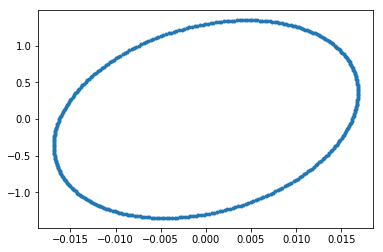

CPU times: user 504 ms, sys: 750 ms, total: 1.25 s
Wall time: 559 ms


In [14]:
%%time
tofwidths = use_covmat.tofwidths(P=10, M=8)
beamdivs = use_covmat.beamdivs(theta=0.01, phi=0.01)
samplethickness = 0.001
# ellipsoid_trace, mR, lambdas = use_covmat.compute(
cm_res = use_covmat.compute(
    sampleyml, Ei, dynamics, scan,
    instrument, pixel,
    tofwidths, beamdivs, samplethickness,
    plot=True)
ellipsoid_trace = cm_res['u']

# Use Res Comps

In [14]:
!mcvine-neutron-storage-count-neutrons /SNS/users/p63/ORNL_public_research/MCViNE_Covmat_comparison/mcvine_resolution/beams/beam_125_1e9/out/neutrons

240459


In [15]:
rm -rf out.res_comps_tmp/

In [15]:
beam = "/SNS/users/p63/ORNL_public_research/MCViNE_Covmat_comparison/mcvine_resolution/beams/beam_125_1e9"
psi_axis = scan
use_res_comps.setup(
    'out.res_comps_tmp', sampleyml, beam, dynamics.E, dynamics.hkl0, dynamics.hkl_dir,
    psi_axis, instrument, pixel)

Ei=126.211753632, t0=16.0728240277
Computed:
* psi=6.74520975278 degree
* Q=[ 0.70472623 -5.95846968  0.        ]
* hkl2Qmat=[[-0.73798758  6.23969486  0.        ]
 [ 0.          0.          6.28318531]
 [ 6.23969486  0.73798758  0.        ]]
* ki=7.80444915794
* vectors ki=[ 7.80444916  0.          0.        ], kf=[ 7.09972293  5.95846968  0.        ]
These two numbers should be very close:
  -51.8030461602
  -51.8030461602
  Ei=126.211753632, Ef=178.014799792
* Ef=178.014799792
* pixel positon=[ 2.29795884  1.92857076  0.        ]
* pixel_position=[ 2.29795884  1.92857076  0.        ]
t_m2s=0.00278375914959, t_s2p=0.000514068579162, t_m2p=0.00329782772875


In [16]:
ls out.res_comps_tmp/

run.py  sample/


In [17]:
cat out.res_comps_tmp/run.py

#!/usr/bin/env python
import mcvine.cli
from numpy import array
from mcvine_workflow.singlextal.resolution import use_res_comps as urc
beam_neutrons_path = '/SNS/users/p63/ORNL_public_research/MCViNE_Covmat_comparison/mcvine_resolution/beams/beam_125_1e9/out/neutrons'
instrument = urc.instrument('ARCS', '3.*meter', '13.6*meter', '-0.15*meter')
samplexmlpath = '/SNS/users/p63/ORNL_public_research/MCViNE_Covmat_comparison_v2/1-mcvine-covmat-comparison/out.res_comps_tmp/sample/sampleassembly.xml'
psi = 0.11772611892360563
hkl2Q = array([[-0.73798758,  6.23969486,  0.        ],
       [ 0.        ,  0.        ,  6.28318531],
       [ 6.23969486,  0.73798758,  0.        ]])
pp = array([ 2.29795884,  1.92857076,  0.        ])
pixel = urc.pixel('0.5*inch', 'meter/128', '10*atm', position=(pp[1], pp[2], pp[0]))
t_m2p = 0.0032978277287488969
Q = array([ 0.70472623, -5.95846968,  0.        ])
E = -51.80304616018887
hkl_projection = array([ 1.,  0.,  0.])
urc.run(
    beam_neutrons_path, instrume

In [18]:
%%time
%cd {workdir}/out.res_comps_tmp/
!python run.py >log.run
%cd {workdir}

/SNS/users/p63/ORNL_public_research/MCViNE_Covmat_comparison_v2/1-mcvine-covmat-comparison/out.res_comps_tmp
/SNS/software/miniconda2/envs/mcvine-unstable/lib/python2.7/site-packages/mcni/SimulationContext.py:39: UserWarning: output directory was not set
  warnings.warn("output directory was not set")
/SNS/users/p63/ORNL_public_research/MCViNE_Covmat_comparison_v2/1-mcvine-covmat-comparison
CPU times: user 542 ms, sys: 177 ms, total: 719 ms
Wall time: 27.3 s


In [19]:
ls out.res_comps_tmp/

dEs.npy  dhkls.npy  dxs.npy  log.run  probs.npy  res.h5  run.py  sample/


## Get mcvine-simulated data

In [20]:
dhkls = np.load('out.res_comps_tmp/dhkls.npy')
dEs = np.load('out.res_comps_tmp/dEs.npy')
probs = np.load('out.res_comps_tmp/probs.npy')

In [21]:
dhs,dks,dls = dhkls.T

## get slice of resolution 

In [22]:
mask=(dls<0.02)*(dls>-0.02)*(dks<0.02)*(dks>-0.02)

hist, qedges, Eedges = np.histogram2d(
    x=dhs[mask], y=dEs[mask], bins=(np.arange(-1, 1, 0.002), np.arange(-15,8,0.1)), weights=probs[mask])

qaxis = H.axis('q', boundaries=qedges)
Eaxis = H.axis('E', boundaries=Eedges)
IqE = H.histogram('IqE', (qaxis, Eaxis), data=hist)

plot z in (0.0, 15.668325555)


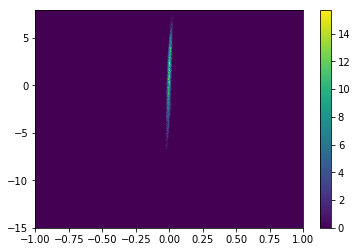

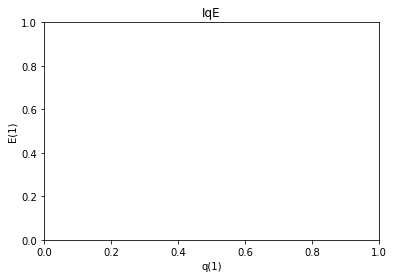

In [23]:
H.plot(IqE)

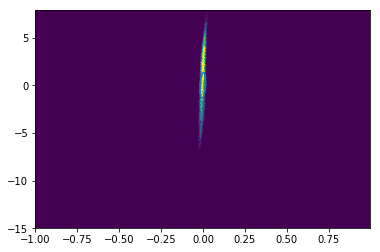

In [24]:
qgrid, Egrid = np.mgrid[
    IqE.q[0] : IqE.q[-1]+1e-10 : IqE.q[1]-IqE.q[0],
    IqE.E[0] : IqE.E[-1]+1e-10 : IqE.E[1]-IqE.E[0]
]
plt.pcolormesh(qgrid, Egrid, IqE.I)
plt.clim(0, 10)
plt.plot(ellipsoid_trace[:,0], ellipsoid_trace[:,1])

# Plot along xyz directions

In [26]:
%%time
"""
tofwidths = use_covmat.tofwidths(P=10, M=2)
beamdivs = use_covmat.beamdivs(theta=0.05, phi=0.05)
samplethickness = 0.0001
instrument = use_covmat.instrument(
    name = 'ARCS',
    detsys_radius = "3.*meter",
    L_m2s = "11.7*meter",
    L_m2fc = "11.61*meter",
    offset_sample2beam = "-0.15*meter" # offset from sample to saved beam
    )
pixel = use_covmat.pixel(
    radius = "0.5*inch",
    height = "meter/128",
    pressure = "10*atm",
    )
"""
unit_vectors = [[1,0,0], [0,1,0], [0,0,1]]
axes = 'hkl'

traces = []
IqEs = []
for axis_index, uv in enumerate(unit_vectors):
    dynamics.hkl_dir = np.array(uv)
    # ellipsoid_trace, mR, lambdas = use_covmat.compute(
    cm_res = use_covmat.compute(
        sampleyml, Ei, dynamics, scan,
        instrument, pixel,
        tofwidths, beamdivs, samplethickness,
        plot=False)
    ellipsoid_trace = cm_res['u']
    traces.append(ellipsoid_trace)
    
    mask = True
    for axis_index2, axis in enumerate(axes):
        if axis_index2==axis_index: continue # skip the axis of interest
        # print "d%ss<0.02"%axis, "d%ss>-0.02"%axis
        mask *= eval("d%ss<0.001"%axis)*eval("d%ss>-0.001"%axis)
        continue
    # print mask.shape, mask.sum(), mask.dtype
    dqs = eval("d%ss" % axes[axis_index])
    hist, qedges, Eedges = np.histogram2d(
        x=dqs[mask], y=dEs[mask], bins=(np.arange(-1, 1, 0.002), np.arange(-15,8,0.1)), weights=probs[mask])
    # hist, qedges, Eedges = np.histogram2d(
    #    x=dqs, y=dEs, bins=(np.arange(-0.2, 0.2, 0.002), np.arange(-15,8,0.1)), weights=probs)
    qaxis = H.axis('q', boundaries=qedges)
    Eaxis = H.axis('E', boundaries=Eedges)
    # print hist.sum()
    IqE = H.histogram('IqE', (qaxis, Eaxis), data=hist)
    IqEs.append(IqE)
    continue

psi=6.75090167372, Q=[ 0.70531815 -5.95839964  0.        ]
hkl2Q=array([[-0.73860744,  6.23962151,  0.        ],
       [ 0.        ,  0.        ,  6.28318531],
       [ 6.23962151,  0.73860744,  0.        ]])
(Q = hkl dot hkl2Q)
6.0
7.79789939468
[ 7.09258124  5.95839964  0.        ]
ti= 2364.69322632
tf= 514.374601753
R= 3.0
Q= [ 0.70531815 -5.95839964  0.        ]
eeta= 0.698712016726
psi=6.75090167372, Q=[ 0.70531815 -5.95839964  0.        ]
hkl2Q=array([[-0.73860744,  6.23962151,  0.        ],
       [ 0.        ,  0.        ,  6.28318531],
       [ 6.23962151,  0.73860744,  0.        ]])
(Q = hkl dot hkl2Q)
6.0
7.79789939468
[ 7.09258124  5.95839964  0.        ]
ti= 2364.69322632
tf= 514.374601753
R= 3.0
Q= [ 0.70531815 -5.95839964  0.        ]
eeta= 0.698712016726
psi=6.75090167372, Q=[ 0.70531815 -5.95839964  0.        ]
hkl2Q=array([[-0.73860744,  6.23962151,  0.        ],
       [ 0.        ,  0.        ,  6.28318531],
       [ 6.23962151,  0.73860744,  0.        ]])
(Q = hkl

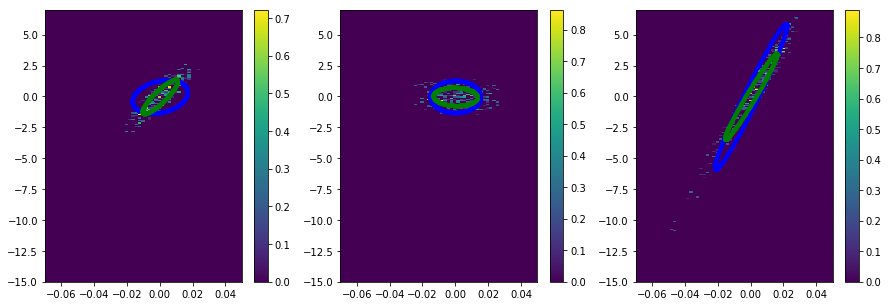

In [41]:
plt.figure(figsize=(15, 5))
for i, (trace, IqE) in enumerate(zip(traces, IqEs)):
    plt.subplot(1, 3, i+1)
    qgrid, Egrid = np.mgrid[
        IqE.q[0] : IqE.q[-1]+1e-10 : IqE.q[1]-IqE.q[0],
        IqE.E[0] : IqE.E[-1]+1e-10 : IqE.E[1]-IqE.E[0]
    ]
    
    # compute covariance of mcvine resolution data
    I_arr = IqE.I
    weighted_qs = np.multiply(qgrid, IqE.I)
    weighted_Es = np.multiply(Egrid, IqE.I)
    sum_weights = np.sum(IqE.I)
    q_avg = np.average(qgrid, axis=None, weights=IqE.I)
    E_avg = np.average(Egrid, axis=None, weights=IqE.I)
    q_avg_array = np.zeros(I_arr.shape)
    q_avg_array.fill(q_avg)
    q_diffs = qgrid - q_avg_array
    q_diffs2 = np.square(q_diffs)
    w_q_diffs2 = np.multiply(q_diffs2, I_arr)
    wq_diff_sum = np.sum(w_q_diffs2)
    Var_q = wq_diff_sum / sum_weights
    
    E_avg_array = np.zeros(I_arr.shape)
    E_avg_array.fill(E_avg)
    E_diffs = Egrid - E_avg_array
    E_diffs2 = np.square(E_diffs)
    w_E_diffs2 = np.multiply(E_diffs2, I_arr)
    wE_diff_sum = np.sum(w_E_diffs2)
    Var_E = wE_diff_sum / sum_weights
    
    product_diffs = np.multiply(q_diffs, E_diffs)
    w_prod_diffs = np.multiply(product_diffs, I_arr)
    sum_w_prod_diffs = np.sum(w_prod_diffs)
    Cov_qE = sum_w_prod_diffs / sum_weights
    
    mcv_covmat = np.array([[Var_q, Cov_qE], [Cov_qE, Var_E]])
    
    mcv_N = np.linalg.inv(mcv_covmat)  # compute inverse of covariance matrix
    mcv_r = np.linalg.eig(mcv_N)
    mcv_mR = mcv_r[1]; mcv_lambdas = mcv_r[0]
    RR = 2*np.log(2)
    mcv_theta = np.arange(0, 360, 1.)*np.pi/180
    mcv_u1p = np.sqrt(RR/mcv_lambdas[0])*np.cos(mcv_theta)
    mcv_u2p = np.sqrt(RR/mcv_lambdas[1])*np.sin(mcv_theta)
    mcv_up = np.array([mcv_u1p, mcv_u2p]).T
    mcv_mR_T = mcv_mR.T
    mcv_u = np.dot(mcv_up, mcv_mR_T)
    
    plt.pcolormesh(qgrid, Egrid, IqE.I)
    #plt.clim(0, 1e-1)
    plt.colorbar()
    plt.plot(trace[:,0], trace[:,1], 'b.')
    plt.plot(mcv_u[:,0], mcv_u[:,1], 'g.')
    plt.xlim(-0.07, 0.05)
    plt.ylim(-15, 7)

In [ ]:
# Compute covariance of mcvine resolution data